
# ***Telecom-churn-prediction (Logistic regression)***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
sns.set(style = 'white')

**Importing dataset**

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**Data cleaning (checking for null values and removing it)**

In [9]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
#Removing missing values
df.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [12]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


<Axes: >

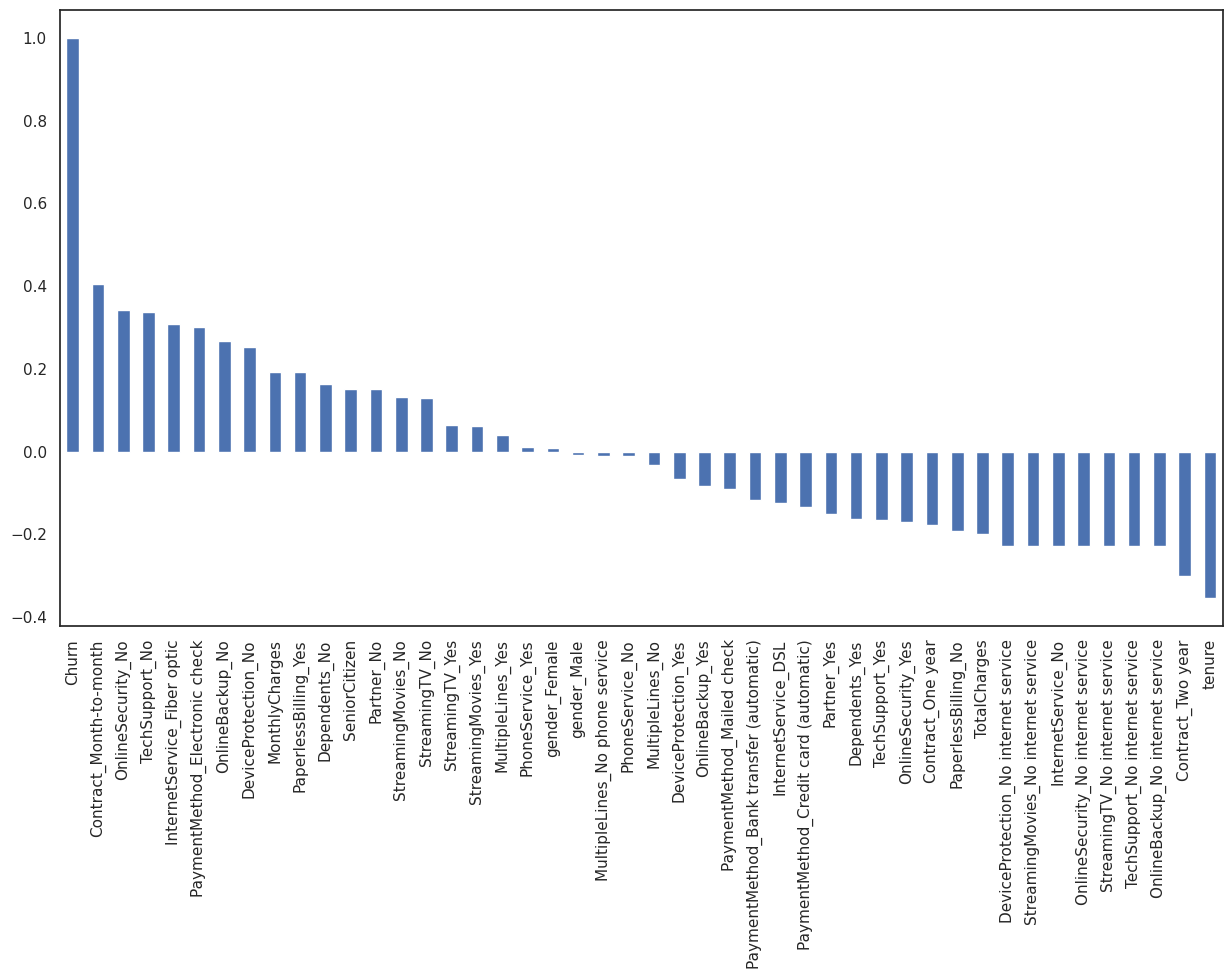

In [13]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<ipython-input-14-52848c8379b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data  = df.corr()


<Axes: >

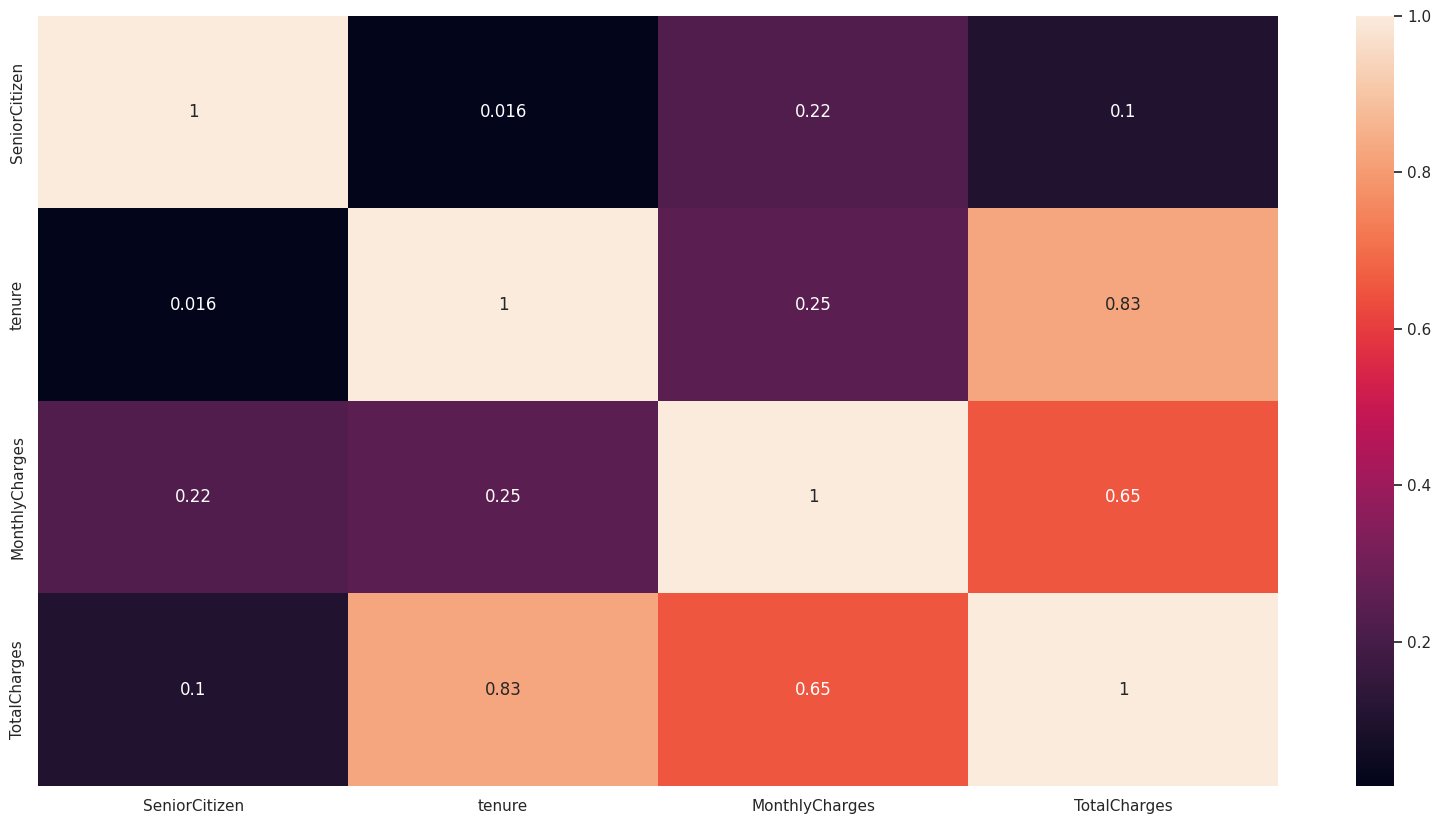

In [14]:
data  = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)

Exploratory Data Analysis

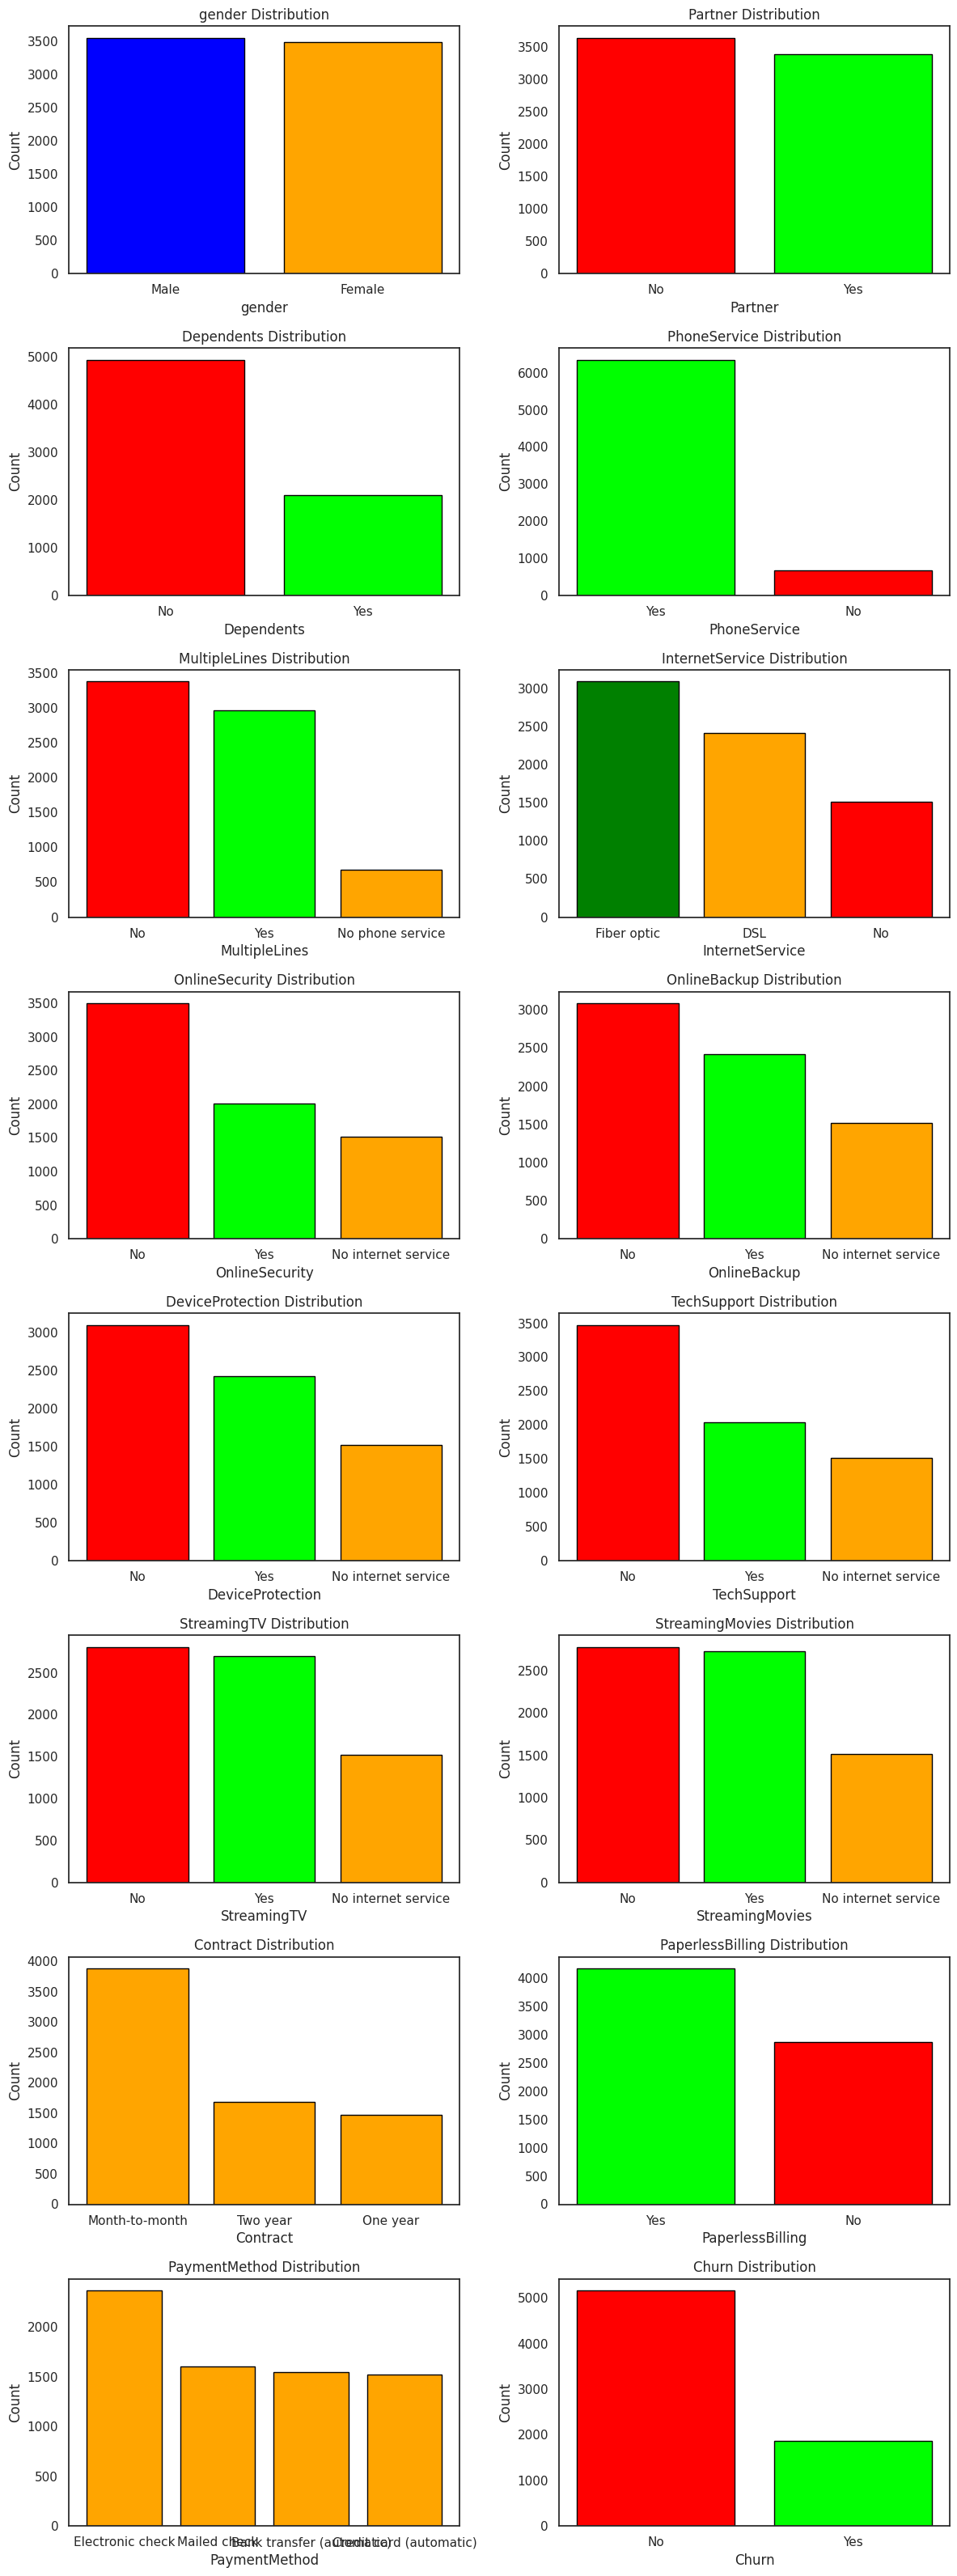

In [15]:
categorical_variables = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod','Churn']



n_cols = 2
n_rows = (len(categorical_variables) + 1) // n_cols

fig_width = 6 * n_cols
fig_height = 4 * n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

for i, variable in enumerate(categorical_variables):
    variable_count = df[variable].value_counts()
    colors = ['red' if value == 'No' else 'lime' if value == 'Yes' else 'blue' if value == 'Male' else 'green' if value == 'Fiber optic' else 'orange' for value in variable_count.index]
    axes[i].bar(variable_count.index, variable_count.values, color=colors,edgecolor='black')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{variable} Distribution')


plt.tight_layout()
plt.show()

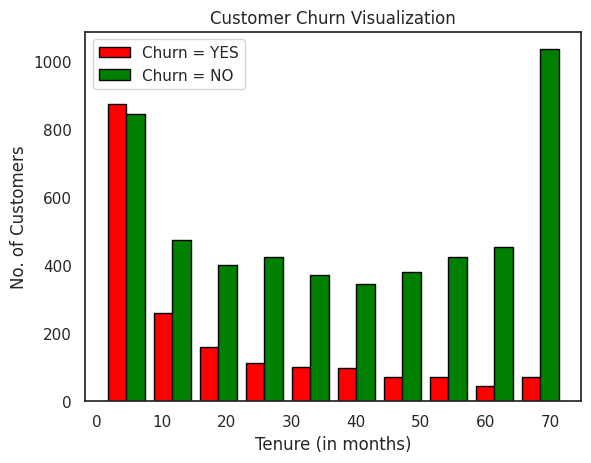

In [16]:
tensure_churn_no = df[df.Churn == 'No'].tenure
tensure_churn_yes = df[df.Churn == 'Yes'].tenure
plt.xlabel('Tenure (in months)')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Visualization')

plt.hist([tensure_churn_yes,tensure_churn_no], color = ['red','green'],label = ['Churn = YES','Churn = NO'] ,edgecolor = 'black')
plt.legend()

Text(0.5, 1.0, 'Churn Status')

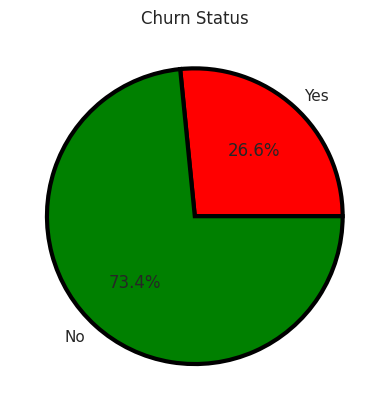

In [17]:
churn_count_yes = df['Churn'].value_counts()['Yes']
churn_count_no = df['Churn'].value_counts()['No']
labels = ['Yes', 'No']
sizes = [churn_count_yes , churn_count_no ]
colors = ['red','green']
plt.pie(sizes,labels=labels, colors = colors, autopct='%1.1f%%',wedgeprops= {"edgecolor":"black",'linewidth': 3})
plt.title('Churn Status')

customer churn vs total cahrges

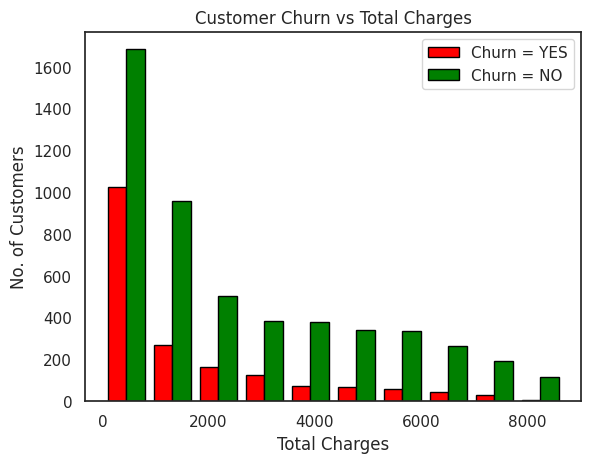

In [18]:
TotalCharges_churn_no = df[df.Churn == 'No'].TotalCharges
TotalCharges_churn_yes = df[df.Churn == 'Yes'].TotalCharges

plt.xlabel('Total Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn vs Total Charges')

plt.hist([TotalCharges_churn_yes,TotalCharges_churn_no], color = ['red','green'],label = ['Churn = YES','Churn = NO'] ,edgecolor = 'black')
plt.legend()

<ipython-input-19-c6a7c1077d4c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
<ipython-input-19-c6a7c1077d4c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of Total Charges by churn')

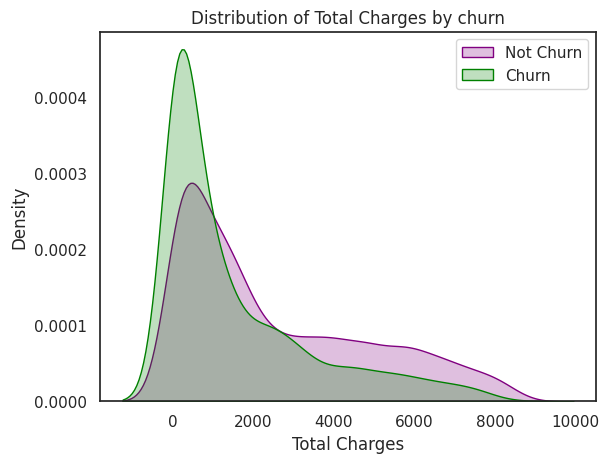

In [19]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="purple", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="green", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by churn')

customer churn vs Montly charges

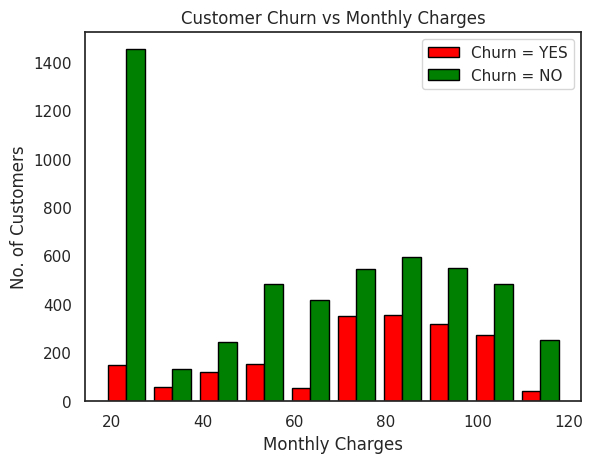

In [20]:
MonthlyCharges_churn_no = df[df.Churn == 'No'].MonthlyCharges
MonthlyCharges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn vs Monthly Charges')

plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no], color = ['red','green'],label = ['Churn = YES','Churn = NO'] ,edgecolor = 'black')
plt.legend()

<ipython-input-21-70c7d096ffa1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
<ipython-input-21-70c7d096ffa1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

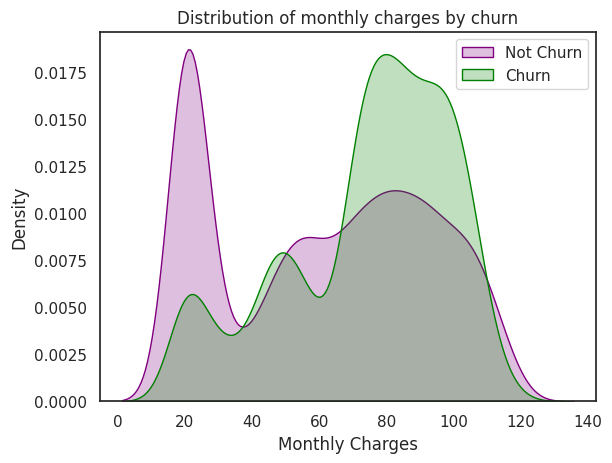

In [21]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="purple", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="green", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

<ipython-input-22-8a3d249b7422>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
<ipython-input-22-8a3d249b7422>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
<ipython-input-22-8a3d249b7422>:2

Text(0.5, 1.0, 'Two Year Contract')

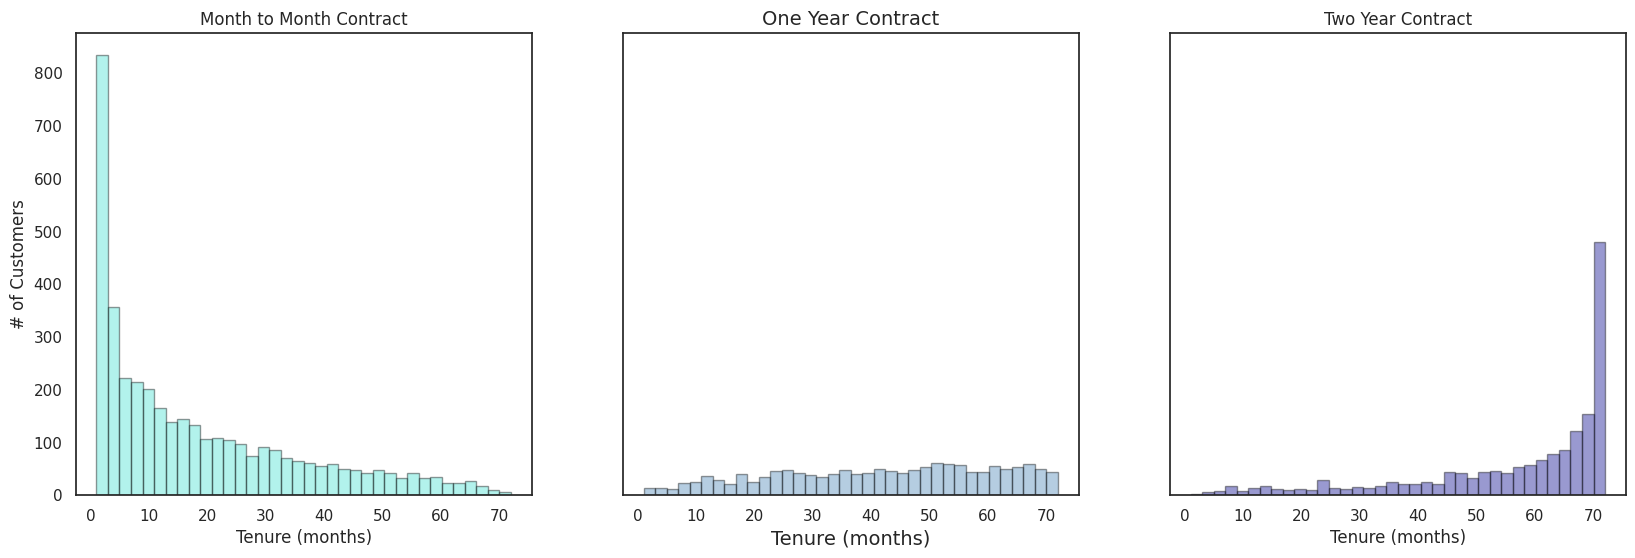

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

# ***Logistic Regression***

In [23]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [24]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [25]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [26]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8145620022753128


Axes(0.125,0.11;0.775x0.77)


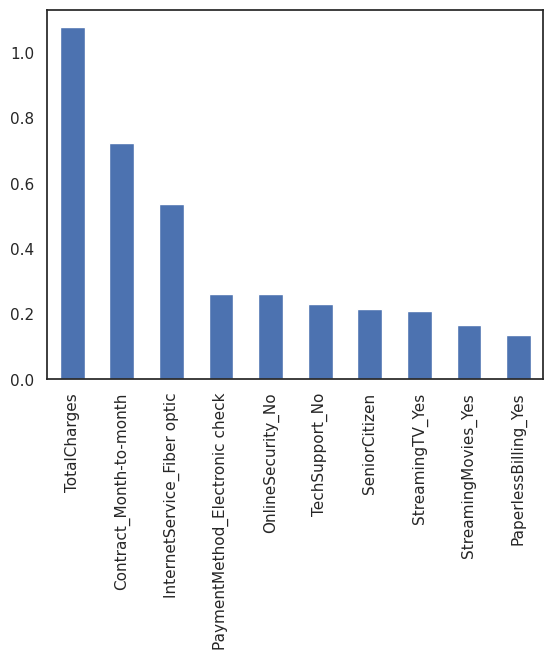

In [27]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Text(91.25, 0.5, 'Truth')

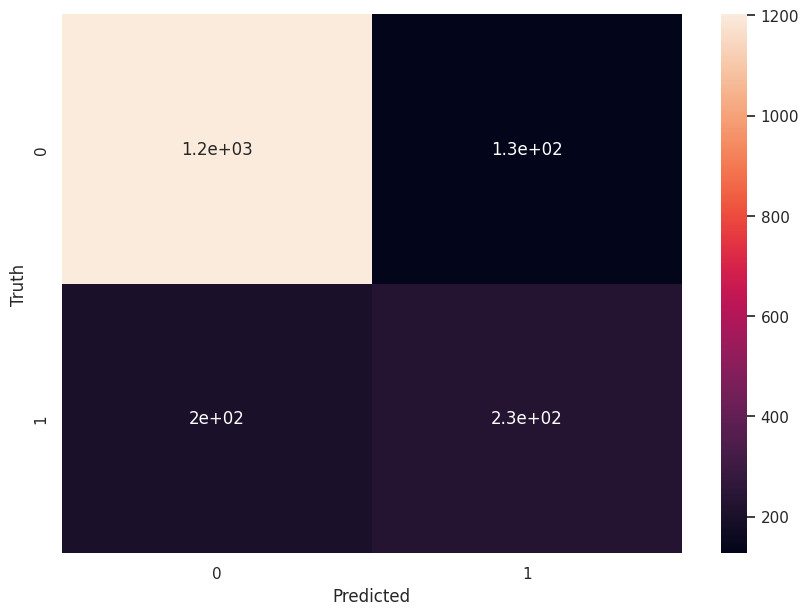

In [28]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1329
           1       0.64      0.54      0.59       429

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.81      0.81      0.81      1758



In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction_test)

0.8145620022753128

# In the end we conclude that the Telecom Customer Churn Prediction has an accuracy score of 81.45%